<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Scikit-Learn-Introduction" data-toc-modified-id="Scikit-Learn-Introduction-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Scikit-Learn Introduction</a></span><ul class="toc-item"><li><span><a href="#Data-visualization" data-toc-modified-id="Data-visualization-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Data visualization</a></span></li><li><span><a href="#Data-preparation" data-toc-modified-id="Data-preparation-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Data preparation</a></span></li><li><span><a href="#Apply-model-and-make-predictions" data-toc-modified-id="Apply-model-and-make-predictions-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Apply model and make predictions</a></span><ul class="toc-item"><li><span><a href="#test/evaluate-model" data-toc-modified-id="test/evaluate-model-1.3.1"><span class="toc-item-num">1.3.1&nbsp;&nbsp;</span>test/evaluate model</a></span></li></ul></li><li><span><a href="#Further-model----Gaussian-Naive-Bayes" data-toc-modified-id="Further-model----Gaussian-Naive-Bayes-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>Further model -- Gaussian Naive Bayes</a></span></li><li><span><a href="#Two-short-examples--on-unsupervised-ML" data-toc-modified-id="Two-short-examples--on-unsupervised-ML-1.5"><span class="toc-item-num">1.5&nbsp;&nbsp;</span>Two short examples  on unsupervised ML</a></span><ul class="toc-item"><li><span><a href="#Dimensionality-Reduction" data-toc-modified-id="Dimensionality-Reduction-1.5.1"><span class="toc-item-num">1.5.1&nbsp;&nbsp;</span>Dimensionality Reduction</a></span></li><li><span><a href="#Clustering" data-toc-modified-id="Clustering-1.5.2"><span class="toc-item-num">1.5.2&nbsp;&nbsp;</span>Clustering</a></span></li></ul></li><li><span><a href="#Clustering-applied-to-digit-data" data-toc-modified-id="Clustering-applied-to-digit-data-1.6"><span class="toc-item-num">1.6&nbsp;&nbsp;</span>Clustering applied to digit data</a></span></li><li><span><a href="#Image-data-with-sklearn:" data-toc-modified-id="Image-data-with-sklearn:-1.7"><span class="toc-item-num">1.7&nbsp;&nbsp;</span>Image data with sklearn:</a></span><ul class="toc-item"><li><span><a href="#PCA" data-toc-modified-id="PCA-1.7.1"><span class="toc-item-num">1.7.1&nbsp;&nbsp;</span>PCA</a></span></li><li><span><a href="#Test-Isomap" data-toc-modified-id="Test-Isomap-1.7.2"><span class="toc-item-num">1.7.2&nbsp;&nbsp;</span>Test Isomap</a></span></li><li><span><a href="#Digit-classification" data-toc-modified-id="Digit-classification-1.7.3"><span class="toc-item-num">1.7.3&nbsp;&nbsp;</span>Digit classification</a></span><ul class="toc-item"><li><span><a href="#First-kNN:" data-toc-modified-id="First-kNN:-1.7.3.1"><span class="toc-item-num">1.7.3.1&nbsp;&nbsp;</span>First kNN:</a></span></li><li><span><a href="#Then--Gaussian-Naive-Bayes:" data-toc-modified-id="Then--Gaussian-Naive-Bayes:-1.7.3.2"><span class="toc-item-num">1.7.3.2&nbsp;&nbsp;</span>Then  Gaussian Naive Bayes:</a></span></li></ul></li></ul></li></ul></li></ul></div>

# Scikit-Learn Introduction
A number of Python packages provide implementations of  machine learning algorithms. 
**[Scikit-Learn](http://scikit-learn.org)** is one of the most popular.
* it provides many of the common ML algorithms
* well-designed, uniform API (programming interface)
  * standardized and largely streamlined setup of the different models   
    &rarr; easy to switch
* good documentation

The first example is based on the **[Iris dataset](https://en.wikipedia.org/wiki/Iris_flower_data_set)**. This had already been introduced by famous statistician
Ronald Fisher in 1936 and is used since then as instructive use case for classification. 
The data consists of
* measurements of length and width of both sepal (Bl&uuml;tenkelch) and petal (Bl&uuml;te) 
* classification of Iris sub-species



In [1]:
# the usual setup: 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# seaboorn provides easy way to import iris dataset as pandas dataframe
import seaborn as sns
iris = sns.load_dataset('iris')
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [3]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
sepal_length    150 non-null float64
sepal_width     150 non-null float64
petal_length    150 non-null float64
petal_width     150 non-null float64
species         150 non-null object
dtypes: float64(4), object(1)
memory usage: 5.9+ KB


## Data visualization
First step should always be some investigation of data properties, i.e.
* basic statistical properties
* visualization of distributions


In [4]:
# basic statistics with pandas
iris.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


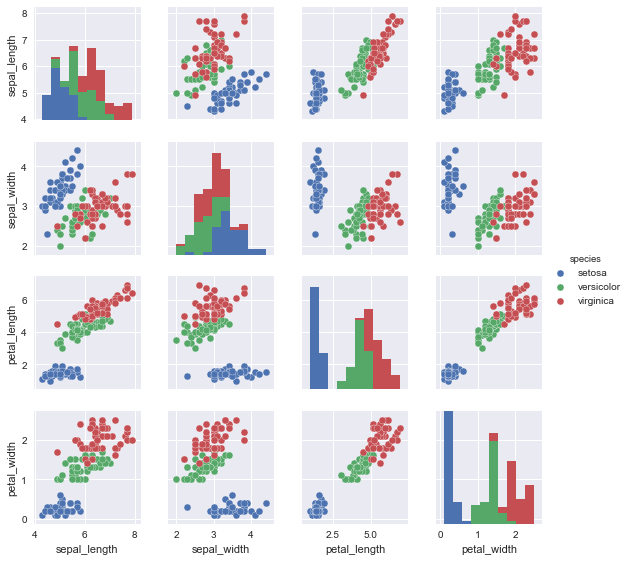

In [5]:
# seaborn provides very useful matrix scatter plot of variables in dataframe
#
# will provide scatter plot of all combinations of numerical columns in dataframe
# target (=species) can be given and will cause different colors
sns.pairplot(iris, hue='species', size=2.0)

## Data preparation
For use in sklearn with  **supervised learning** the first step is always to split  data into 
* table/matrix of **features**
* list of **targets**

And then split the data into **train** and **test** sample:
* `train_test_split` function from sklearn
* by default 75% for training and 25% for test and validation
  * can be specified as parameter
* randomized selection of entries  
&rarr; inital order does not matter

In [6]:
# feature matrix
X=iris.ix[:,'sepal_length':'petal_width']
X.shape

(150, 4)

In [7]:
# target
Y=iris.species
Y.shape

(150,)

In [8]:
# break-up in train & test sample
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, Y)

In [9]:
print("X_train shape: {}".format(X_train.shape))
print("y_train shape: {}".format(y_train.shape))
print("X_test shape: {}".format(X_test.shape))
print("y_test shape: {}".format(y_test.shape))

X_train shape: (112, 4)
y_train shape: (112,)
X_test shape: (38, 4)
y_test shape: (38,)


In [10]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)

In [11]:
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

## Apply model and make predictions

In [12]:
# create dummy iris
X_new = np.array([[5, 2.9, 1, 0.2]])
# 2D format required, nrows vs ncolums (1x2)
X_new.shape #

(1, 4)

In [13]:
knn.predict(X_new) # apply model to new data point

array(['setosa'], dtype=object)

### test/evaluate model


In [14]:
y_pred = knn.predict(X_test)
print("Test set predictions:\n {}".format(y_pred))

Test set predictions:
 ['virginica' 'versicolor' 'virginica' 'versicolor' 'virginica' 'virginica'
 'setosa' 'versicolor' 'versicolor' 'virginica' 'setosa' 'virginica'
 'virginica' 'versicolor' 'versicolor' 'versicolor' 'setosa' 'virginica'
 'setosa' 'versicolor' 'versicolor' 'setosa' 'setosa' 'virginica'
 'versicolor' 'versicolor' 'versicolor' 'setosa' 'versicolor' 'virginica'
 'versicolor' 'setosa' 'versicolor' 'versicolor' 'virginica' 'virginica'
 'versicolor' 'virginica']


In [15]:
# use scilearn function for score
from sklearn.metrics import accuracy_score
score = accuracy_score(y_pred, y_test)
print("Test set score: {:.3f}".format(score))

Test set score: 0.974


***
A further useful check is the **confusion matrix** which gives detailed Info on mis-classifications:

In [16]:
from sklearn.metrics import confusion_matrix

labels = np.unique(y_test)
mat = confusion_matrix(y_test, y_pred, labels)
print (labels,'\n', mat)

['setosa' 'versicolor' 'virginica'] 
 [[ 8  0  0]
 [ 0 17  1]
 [ 0  0 12]]


***
** Repeat with different settings for number of neighbors **

** Usually high accuracy for Iris data **  
as scatter plot suggested there is rather clear separation between species

***
## Further model -- Gaussian Naive Bayes
Also a conceptually simple model
* basic assumption is that for each different category (*Iris-species*) the variables follow a Gaussian distribution.
* In training the model determines parameters of these Gaussians
* For classification then simply calculate probability of a given new Iris-data to be of species `i` based on Gaussian probability:
$$ P(x) = \frac{1}{{\sigma_i \sqrt {2\pi } }}e^{{{ - \left( {x - \mu_i } \right)^2 } \, } \left/ \right. {\, {2\sigma_i ^2 }}}$$
* where $\mu_i$ and $\sigma_i$ are mean and standarddeviation for respecitve variable and species `i`




In [17]:
from sklearn.naive_bayes import GaussianNB # 1. choose model class
model = GaussianNB()                       # 2. instantiate model
model.fit(X_train, y_train)                  # 3. fit model to data
y_gnb = model.predict(X_test)             # 4. predict on new data

In [18]:
# use scilearn function for score
from sklearn.metrics import accuracy_score
score = accuracy_score(y_gnb, y_test)
print("Test set score: {:.3f}".format(score))

Test set score: 0.974


In [19]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_gnb)

0.97368421052631582

***
## Two short examples  on unsupervised ML

### Dimensionality Reduction
The Iris data is also a good show case for unsupervised learning.  
A common problem is **dimensionality reduction**, i.e. check if there is a lower dimensional representation which retains the essential features.
* In case of Iris data there are four feature dimensions
* scatter plot showed clear correlations between features
  * indication that less dimensions might be sufficient
  
One standard method is principal component analysis (PCA), which can be applied in case of (reasonably) linear correlations.

As before we have to do the usual scikit steps:
* Setup PCA model with 2 dimensions
* fit/train
* get reduced dimensions as output of transform

In [20]:
from sklearn.decomposition import PCA  # 1. Choose the model class
model = PCA(n_components=2)            # 2. Instantiate the model with hyperparameters
model.fit(X)                           # 3. Fit to data. Notice y is not specified!
X_2D = model.transform(X)              # 4. Transform the data to two dimensions

Visualize transformed data:

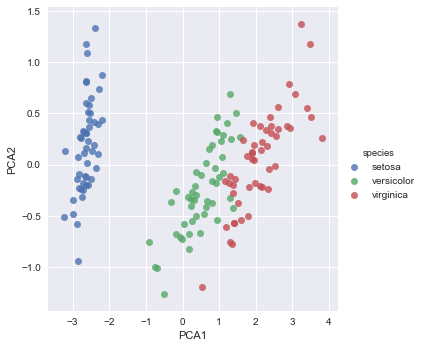

In [21]:
iris['PCA1'] = X_2D[:, 0]
iris['PCA2'] = X_2D[:, 1]
sns.lmplot("PCA1", "PCA2", hue='species', data=iris, fit_reg=False)

### Clustering

A clustering algorithm attempts to find distinct groups of data without reference to any labels.
One powerful method is Gaussian mixture model (GMM) *(Details see Data Science Handbook: 05.12-Gaussian-Mixtures.ipynb)*  
A GMM attempts to model the data as a collection of Gaussian blobs.

We can fit the Gaussian mixture model as follows:

In [25]:
from sklearn.mixture import GaussianMixture      # 1. Choose the model class
#
model =  GaussianMixture(n_components=3,
            covariance_type='full')  # 2. Instantiate the model with hyperparameters

model.fit(X)                    # 3. Fit to data. Notice y is not specified!
y_gmm = model.predict(X)        # 4. Determine cluster labels

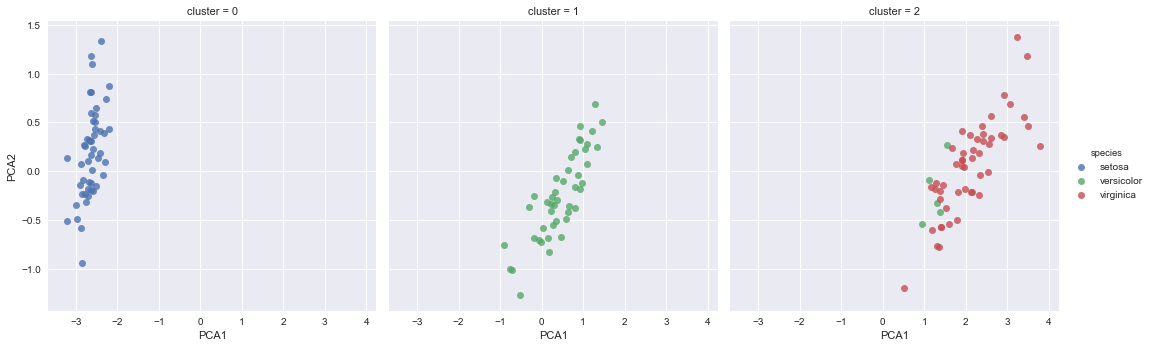

In [26]:
iris['cluster'] = y_gmm
sns.lmplot("PCA1", "PCA2", data=iris, hue='species',
           col='cluster', fit_reg=False);

##### Plot PCA data for each identified cluster  
Indicates good clustering, basically identical to species.


***
## Clustering applied to digit data

Another classic example case for ML is handwritten digits data.

A suitable dataset is included with sklearn, first we look into it:


In [27]:
from sklearn.datasets import load_digits
digits = load_digits()
digits.images.shape

(1797, 8, 8)

In [31]:
type(digits)

sklearn.datasets.base.Bunch

In [32]:
digits?

In [ ]:
print(digits.DESCR)

The data is sklearn specific container, basically a list of 8x8 pixels images

We plot a sub-set:

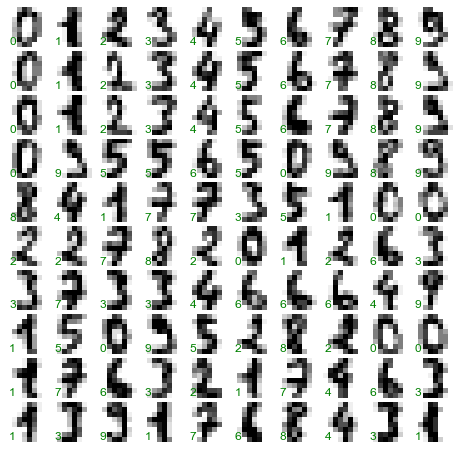

In [33]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(10, 10, figsize=(8, 8),
                         subplot_kw={'xticks':[], 'yticks':[]},
                         gridspec_kw=dict(hspace=0.1, wspace=0.1))

for i, ax in enumerate(axes.flat):
    ax.imshow(digits.images[i], cmap='binary', interpolation='nearest')
    ax.text(0.05, 0.05, str(digits.target[i]),
            transform=ax.transAxes, color='green')

Plot shows pixel image together with label (in green).

* Some images are obvious
* Others seem difficult 

In [36]:
# Look at data from 1st image --> 2D table resembles 0
print (digits.images[0])

[[  0.   0.   5.  13.   9.   1.   0.   0.]
 [  0.   0.  13.  15.  10.  15.   5.   0.]
 [  0.   3.  15.   2.   0.  11.   8.   0.]
 [  0.   4.  12.   0.   0.   8.   8.   0.]
 [  0.   5.   8.   0.   0.   9.   8.   0.]
 [  0.   4.  11.   0.   1.  12.   7.   0.]
 [  0.   2.  14.   5.  10.  12.   0.   0.]
 [  0.   0.   6.  13.  10.   0.   0.   0.]]


## Image data with sklearn:
To use the data with sklearn as before we need a 2D structure: `samples x features` , i.e. the 8x8 images should be transformed into flat 1x64 array.   

Already provided in Dataset, element `data` :

In [35]:
print (digits.data[0])

[  0.   0.   5.  13.   9.   1.   0.   0.   0.   0.  13.  15.  10.  15.   5.
   0.   0.   3.  15.   2.   0.  11.   8.   0.   0.   4.  12.   0.   0.   8.
   8.   0.   0.   5.   8.   0.   0.   9.   8.   0.   0.   4.  11.   0.   1.
  12.   7.   0.   0.   2.  14.   5.  10.  12.   0.   0.   0.   0.   6.  13.
  10.   0.   0.   0.]


In [37]:
# to use as before just re-label
X = digits.data
y = digits.target

### PCA

In [38]:
# first try PCA
from sklearn.decomposition import PCA  # 1. Choose the model class
model = PCA(n_components=2)            # 2. Instantiate the model with hyperparameters
model.fit(X)                      # 3. Fit to data. Notice y is not specified!
X_2D = model.transform(X)         # 4. Transform the data to two dimensions

**now reduced 64 to 2 dimensions  
&rarr; visualize it**

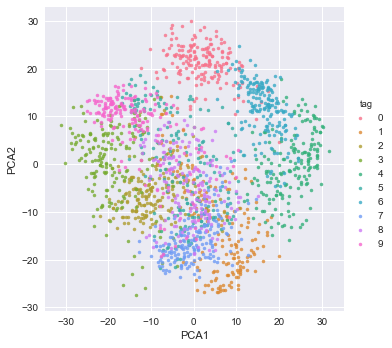

In [62]:
xout=pd.DataFrame()
xout['tag']=y
xout['PCA1'] = X_2D[:, 0]
xout['PCA2'] = X_2D[:, 1]
sns.lmplot("PCA1", "PCA2", hue='tag', data=xout, fit_reg=False, markers='.');


Some digits are nicely isolated, others less so

Think about it, which digits tend to look similar?
***

### Test Isomap 
Alternative method for dimension reduction:

In [52]:
from sklearn.manifold import Isomap
iso = Isomap(n_components=2)
iso.fit(digits.data)
XI_2D = iso.transform(digits.data)

In [55]:
XI_2D.shape

(1797, 2)

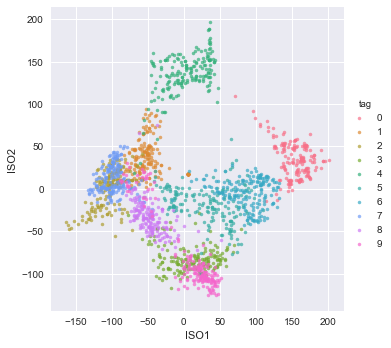

In [79]:
xout_iso=pd.DataFrame()
xout_iso['tag']=y
xout_iso['ISO1'] = XI_2D[:, 0]
xout_iso['ISO2'] = XI_2D[:, 1]
sns.lmplot("ISO1", "ISO2", hue='tag', data=xout_iso, markers='.',fit_reg=False,
           scatter_kws={'alpha':0.7});


Separation clearly better with that method!

***
### Digit classification
Of course what we really want is classification, so let's try our two models we had used before also on digits:

In [80]:
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, random_state=0)

#### First kNN:

In [88]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(Xtrain, ytrain)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=7, p=2,
           weights='uniform')

In [89]:
# use scilearn function for score
from sklearn.metrics import accuracy_score
ypred = knn.predict(Xtest)
score = accuracy_score(ypred, ytest)
print("Test set score: {:.3f}".format(score))

Test set score: 0.978


** check confusion matrix**  
very infomative for such a case

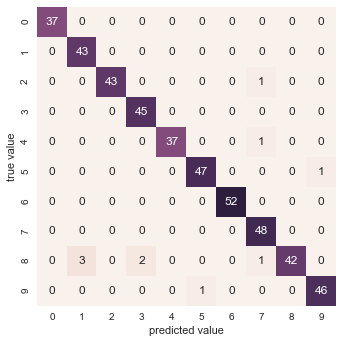

In [90]:
from sklearn.metrics import confusion_matrix
mat = confusion_matrix(ytest, ypred)
sns.heatmap(mat, square=True, annot=True, cbar=False)
plt.xlabel('predicted value')
plt.ylabel('true value');

##### kNN performs really well!

***
#### Then  Gaussian Naive Bayes:

In [91]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(Xtrain, ytrain)
y_model = model.predict(Xtest)

In [92]:
score = accuracy_score(y_model, ytest)
print("Test set score: {:.3f}".format(score))

Test set score: 0.833


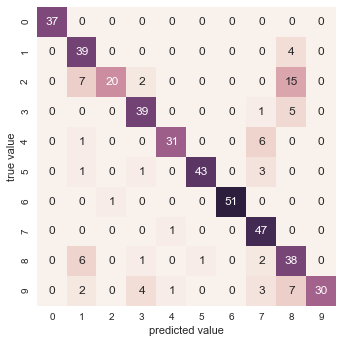

In [93]:
mat = confusion_matrix(ytest, y_model)
sns.heatmap(mat, square=True, annot=True, cbar=False)
plt.xlabel('predicted value')
plt.ylabel('true value');

##### GNB significantly worse, many more mis-ids!